**Image Blending**:

In this exercise we will compare four different image blending techniques.

1) **Direct blending**: the two halves of the image are joined together by concatenation. This image has the sharpest transition boundary.

2) **Smooth blending**: the same as in (1), but Gaussian blur is applied to both images just next to the transition boundary. Why is the transition region smoother than direct blending? What is the effect of changing the size of the blurred region? Experiment with input parameters: width, kernel size, and kernel sigma.

3) **Feathered blending**: an alpha mask is used to blend the two halves of the images together. Turn on the flag to show the mask image. How does the proportion contribution of each image change from left to right? Why is the transition region smoother than in (2)?

4) **Multi-resolution blending**: this is the method you will implement for Assignment 4, and the final result is shown for comparison. What is the difference between this method and (3)? How is the output improved compared to (3)?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import convolve
from scipy import signal
from PIL import Image
import urllib

In [ ]:
def read_img(url):
  return np.array(Image.open(urllib.request.urlopen(url)))/255.

# create 2D gaussian
def create_2d_gaussian(size=9, std=1.5):
    gaussian_1d = signal.gaussian(size,std=std)
    gaussian_2d = np.outer(gaussian_1d, gaussian_1d)
    gaussian_2d = gaussian_2d/(gaussian_2d.sum())
    return gaussian_2d

# concatenate the two images
def blend_direct(im1, im2):
  # TODO: join the two image halves by just concatenating
  return np.concatenate([im1[:, :im1.shape[1]//2], im2[:, im1.shape[1]//2:]], axis=1)

# concatenate and blur the boundary
def blend_smooth(im1, im2, width, ks=31, sig=1.5):

  # concatenate the image halves using direct blending
  dir_im = blend_direct(im1, im2)

  # create a blur kernel using the input kernel size and sigma
  kernel = create_2d_gaussian(size=ks, std=sig)

  # TODO: convolve the blur kernel along the middle of the image
  # use the input width (in pixels) to set the convolve boundary
  out_im = dir_im.copy()
  out_im[:, out_im.shape[1]//2 - width//2 :
            out_im.shape[1]//2 + width//2] = \
        convolve(out_im[:, out_im.shape[1]//2 - width//2 :
                            out_im.shape[1]//2 + width//2], kernel, mode='reflect')

  return out_im


# merge using an alpha mask
def blend_feathering(im1, im2, width, show_mask=False):

  #TODO: Create a mask with ones on left and zeros on right
  mask = np.concatenate([np.ones([im1.shape[0], im1.shape[1]//2]), np.zeros([im1.shape[0], im1.shape[1]//2])], axis=1)

  # TODO: blur the mask for smoother transition
  # Hint: use the Gaussian kernel to blur
  kernel = create_2d_gaussian(size=111, std=1000)
  mask = convolve(mask, kernel, mode='reflect')

  if show_mask:
    fix, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    ax.imshow(mask, cmap='gray')
    ax.axis('off')
    ax.set_title('mask')

  # TODO: Use the mask to blend the images
  return np.multiply(im1, mask) + np.multiply(im2, 1 - mask)

def plot_blend_images(direct_im, smooth_im, feather_im):

  # multi-resolution
  multi_im = read_img('https://raw.githubusercontent.com/W281/fileRepository/main/out_oraple.png')

  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
  # direct image
  ax[0,0].imshow(direct_im, cmap='gray', vmin=0, vmax=1)
  ax[0,0].axis('off')
  ax[0,0].set_title('direct blending')

  # smooth image
  ax[0,1].imshow(smooth_im, cmap='gray', vmin=0, vmax=1)
  ax[0,1].axis('off')
  ax[0,1].set_title('smooth blending')

  # feathering
  ax[1,0].imshow(feather_im, cmap='gray', vmin=0, vmax=1)
  ax[1,0].axis('off')
  ax[1,0].set_title('feathering blending')

  # multiresolution
  ax[1,1].imshow(multi_im, cmap='gray', vmin=0, vmax=1)
  ax[1,1].axis('off')
  ax[1,1].set_title('multi-resolution blending')

  plt.show()

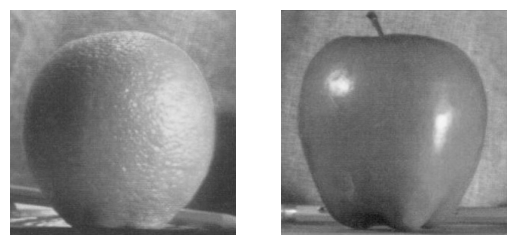

In [ ]:
# Load and display the images

im1_name = 'https://raw.githubusercontent.com/W281/fileRepository/main/orange.png'
im2_name = 'https://raw.githubusercontent.com/W281/fileRepository/main/apple.png'

im1 = read_img(im1_name)
im2 = read_img(im2_name)

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(im1, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(im2, cmap='gray', vmin=0, vmax=1)
ax[0].axis('off')
ax[1].axis('off')
plt.show()


<ipython-input-2-5ebcd2ade57d>:6: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian_1d = signal.gaussian(size,std=std)


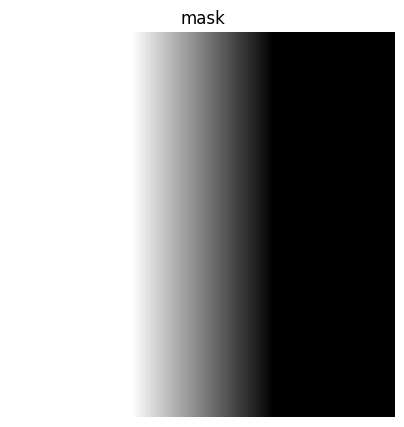

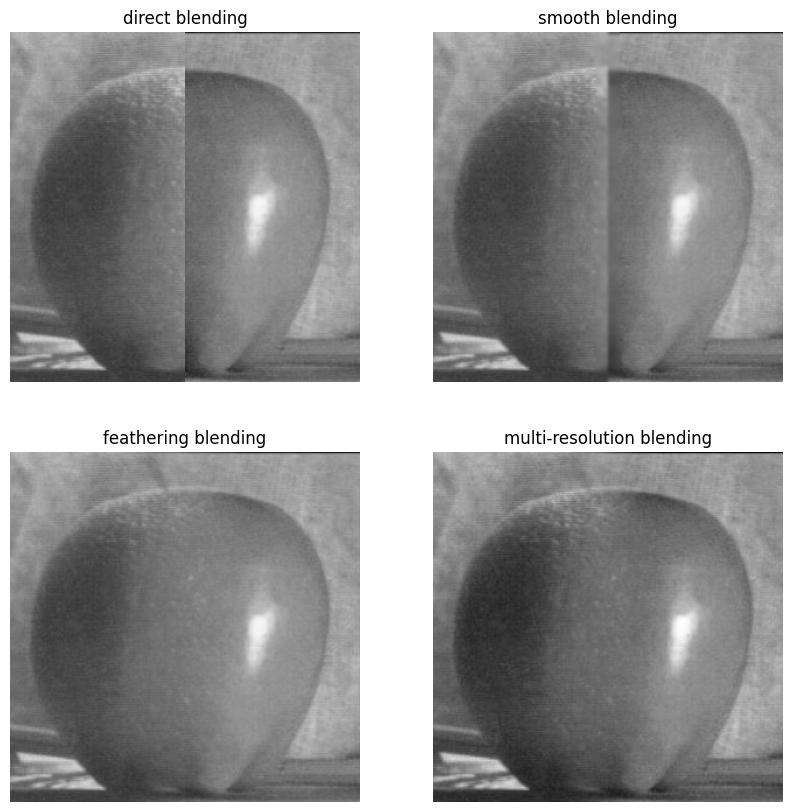

In [ ]:
# Apply each blending method (use plot_blend_images to display the results)

direct_im = blend_direct(im1, im2)

smooth_im = blend_smooth(im1, im2, width=20)

feather_im = blend_feathering(im1, im2, width=30, show_mask=True)

plot_blend_images(direct_im, smooth_im, feather_im)